In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:

voter20 = pd.read_excel("voter20.xlsx")
inter20 = pd.read_excel("inter20.xlsx")

In [3]:
voter20.head()


,State,Percent registered\n(Total),Percent voted\n(Total),Turnout,Label (>mean 0.915)
0,ALABAMA,67.0,59.6,0.889552,0
1,ALASKA,72.6,62.4,0.859504,0
2,ARIZONA,68.8,64.7,0.940407,1
3,ARKANSAS,59.6,51.9,0.870805,0
4,CALIFORNIA,59.3,55.7,0.939292,1


In [4]:
inter20.head()

,State,internet access,Poverty,Margin,"BG(Y=1, N=0)"
0,ALABAMA,78.3,14.6,25.5,0
1,ALASKA,82.3,12.2,10.1,0
2,ARIZONA,78.9,11.2,0.3,1
3,ARKANSAS,81.8,14.7,27.6,0
4,CALIFORNIA,81.2,11.0,29.2,0


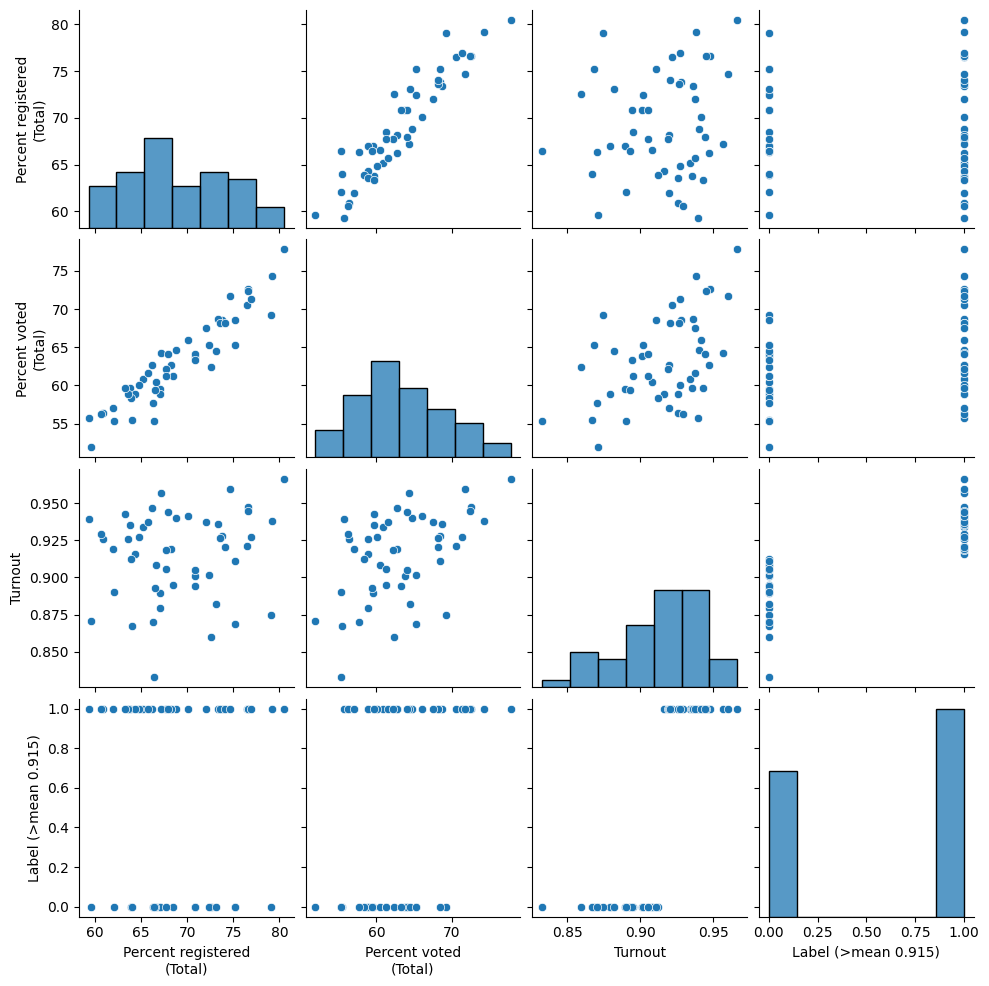

In [5]:
sns.pairplot(voter20)


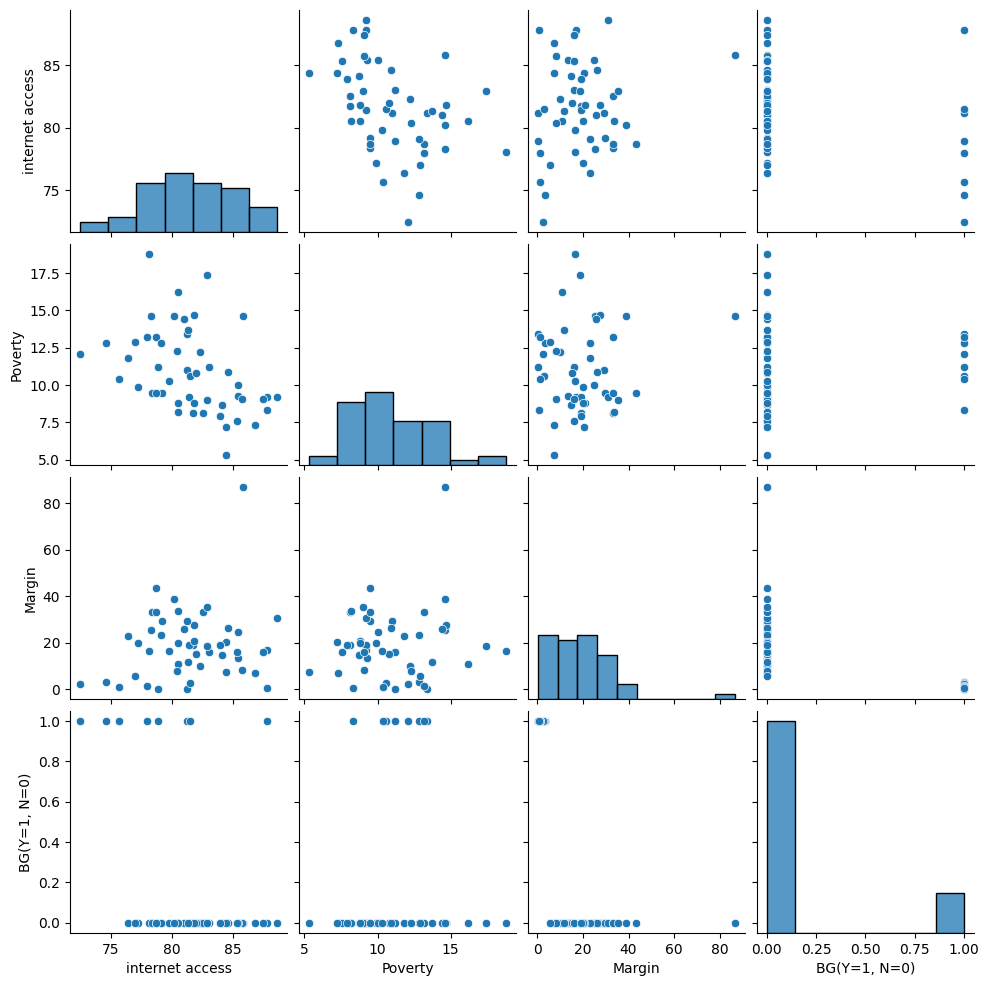

In [6]:
sns.pairplot(inter20)


In [7]:
y = voter20['Label (>mean 0.915)']
X = inter20.iloc[:,1:]
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [8]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.10536044211172324
Coefficients: 
 [ 0.0181398  -0.0971348   0.00913873  0.65451163]


In [9]:
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Label (>mean 0.915)   R-squared:                       0.443
Model:                             OLS   Adj. R-squared:                  0.395
Method:                  Least Squares   F-statistic:                     9.154
Date:                 Fri, 05 May 2023   Prob (F-statistic):           1.58e-05
Time:                         04:53:23   Log-Likelihood:                -21.277
No. Observations:                   51   AIC:                             52.55
Df Residuals:                       46   BIC:                             62.21
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1054      

In [10]:
print('R2 score:', model.rsquared)


R2 score: 0.4432045755178552


In [11]:
print('F-statistic:', model.fvalue)
print('Probability of observing value at least as high as F-statistic:', model.f_pvalue)

F-statistic: 9.153905356165115
Probability of observing value at least as high as F-statistic: 1.584798293928439e-05


In [12]:
print(model.pvalues)

const              0.946920
internet access    0.315066
Poverty            0.000049
Margin             0.045314
BG(Y=1, N=0)       0.000884
dtype: float64
